In [56]:
## Importing Libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib

In [57]:
from sklearn import datasets


In [58]:
# Loading dataset

iris=datasets.load_iris()

features=iris.data

target=iris.target

In [59]:
# Generating a DataFrame
df=pd.DataFrame(features)

df.columns=iris.feature_names

In [60]:
target

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [61]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [78]:
print (df.describe())

df.shape


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


(150, 4)

In [63]:
from pandas.plotting import scatter_matrix



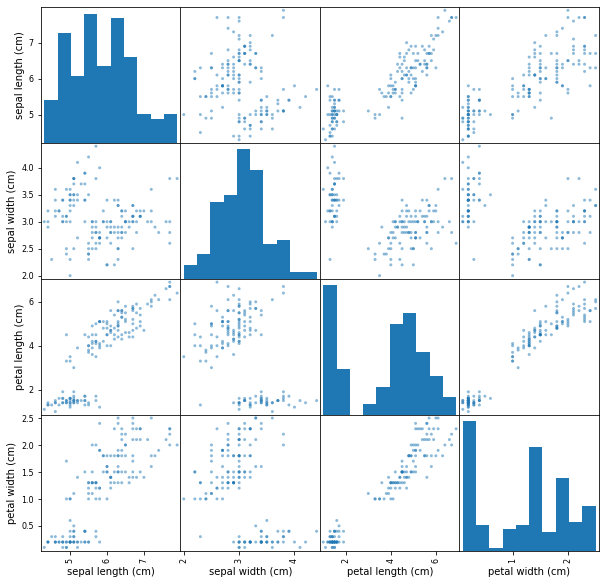

In [72]:
scatter_matrix(df , figsize=(10,10))

plt.show()

In [65]:
# Elbow method to detect total number of clusters

from sklearn.cluster import KMeans

In [66]:
# Empty x and y lists
X=[]
Y=[]

In [67]:
for i in range(1,31) :
    # Initialize and fit the KMeans Model
    kmeans= KMeans(n_clusters = i)
    kmeans.fit(df)

    # Append no. of clusters to x data list
    X.append(i)
    # Append average within cluster sum of squares to y data list
    awcss=kmeans.inertia_ / df.shape[0] 
        
    Y.append(awcss)
    
Y

[4.5424706666666665,
 1.0156530117357194,
 0.5256762761743068,
 0.38152315476190474,
 0.3096412136752137,
 0.2641358334285393,
 0.22904011158770884,
 0.20042073744968483,
 0.18655802440884822,
 0.17538503060292537,
 0.1665640115620534,
 0.15476431060568832,
 0.14365394294559933,
 0.13236815093288778,
 0.1264943077390446,
 0.12326336110918493,
 0.1145591286110404,
 0.10855942077415766,
 0.1051653789062027,
 0.09965838662312348,
 0.0948420634920635,
 0.09219521645021646,
 0.08752938061938063,
 0.08436880952380953,
 0.08301198412698414,
 0.07799037240537242,
 0.07488165945165946,
 0.07266500721500722,
 0.07134116713352007,
 0.06849875661375662]

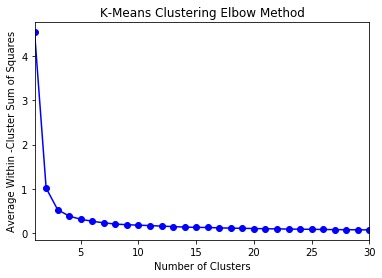

In [69]:
import matplotlib.pyplot as plt
plt.plot(X,Y,'bo-')
plt.xlim((1,30))
plt.xlabel('Number of Clusters')
plt.ylabel('Average Within -Cluster Sum of Squares')
plt.title('K-Means Clustering Elbow Method')

plt.show()

In [70]:
# Principal component Ananlysis

In [74]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [79]:
# Perform PCA
pca=PCA(n_components=2)

pc=pca.fit_transform(df)
# Four dimensions reduces to two dimensions

pc.shape
pc


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [81]:
# refit the Kmeans
kmeans= KMeans(n_clusters = 3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)




# Principal Component Analysis

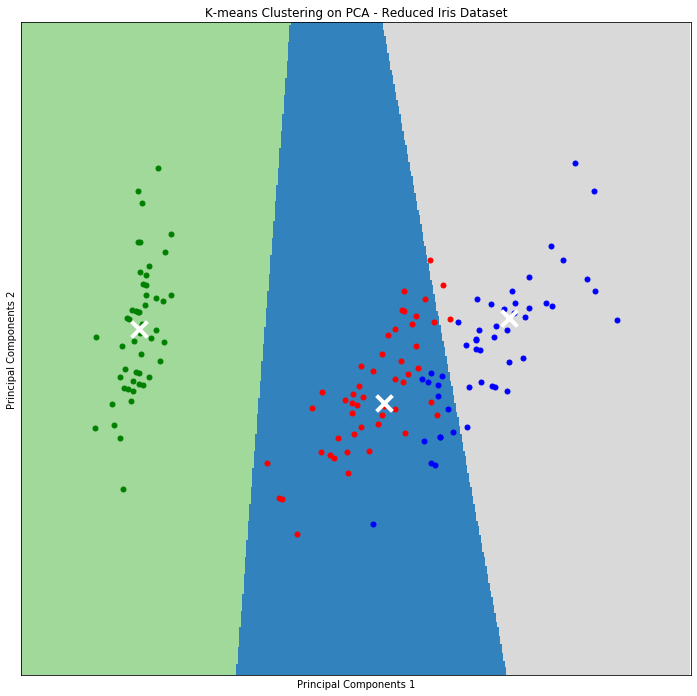

In [101]:
# Visulualize high dimensions using PCA
# Setting size of the mesh
h=0.02

x_min , x_max =pc[: , 0].min() -1 , pc[:,0].max()+1 
y_min , y_max =pc[: , 1].min() -1 , pc[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max, h),np.arange(y_min,y_max,h))

# label each point in mesh using last trained model
Z=kmeans.predict(np.c_[xx.ravel() ,yy.ravel()])

# Generate color plots
Z=Z.reshape(xx.shape) 
plt.figure(figsize=(12,12)) 
plt.clf()
plt.imshow(Z,interpolation='nearest' ,extent=(xx.min() , xx.max(),yy.min(),yy.max()) ,
           cmap=plt.cm.tab20c, aspect='auto', origin='lower')

# Plotting the principal components
for i,point in enumerate(pc):
    if target[i]==0: 
        plt.plot(point[0],point[1],'g.',markersize=10)
    if target[i]==1: 
        plt.plot(point[0],point[1],'r.',markersize=10)
    if target[i]==2: 
        plt.plot(point[0],point[1],'b.',markersize=10)
        
        
# Plot the cluster centroids

centroids = kmeans.cluster_centers_

plt.scatter(centroids[:,0],centroids[:,1], marker='x' , s=250 ,
            linewidth=4 , color='w' , zorder=10)

# Set the plot title

plt.title('K-means Clustering on PCA - Reduced Iris Dataset')
plt.xlim(x_min , x_max)
plt.ylim(y_min , y_max)
plt.xlabel('Principal Components 1')
plt.ylabel('Principal Components 2')
plt.xticks(())
plt.yticks(())

plt.show()

In [125]:
# Homogenuity , Completeness and V-Measure

from sklearn import metrics

# K means clustering on non reduced data

kmeans1= KMeans(n_clusters=3)
kmeans1.fit(features)

# K means clustering on PCA reduced data

kmeans2= KMeans(n_clusters=3)
kmeans2.fit(pc)



# Printing metrics for non reduced data
# Printing Final Comparisons
print('      Non-Reduced Data')
print ()
print('Homogeneity = {}'.format(metrics.homogeneity_score(target , kmeans1.labels_)))
print('Completeness = {}'.format(metrics.completeness_score(target , kmeans1.labels_)))
print('V Measure = {}'.format(metrics.v_measure_score(target , kmeans1.labels_)))

# Printing metrics for PCA reduced data

print ()
print('      PCA-Reduced Data')
print ()
print('Homogeneity = {}'.format(metrics.homogeneity_score(target , kmeans2.labels_)))
print('Completeness = {}'.format(metrics.completeness_score(target , kmeans2.labels_)))
print('V Measure = {}'.format(metrics.v_measure_score(target , kmeans2.labels_)))


homogeneity_loss=metrics.homogeneity_score(target , kmeans1.labels_)-metrics.homogeneity_score(target , kmeans2.labels_)
homogeneity_loss_percent = homogeneity_loss * 100 / metrics.homogeneity_score(target , kmeans1.labels_)

print ()
print ("Total Homogeneity lost :" )
print (homogeneity_loss_percent )

completeness_loss= metrics.completeness_score(target , kmeans1.labels_)-metrics.completeness_score(target , kmeans2.labels_)
completeness_loss_percent = completeness_loss * 100 / metrics.completeness_score(target , kmeans1.labels_)

print ()
print ("Total completeness lost :" )
print (completeness_loss_percent )

v_loss= metrics.v_measure_score(target , kmeans1.labels_)-metrics.v_measure_score(target , kmeans2.labels_)
v_loss_percent = v_loss * 100 / metrics.v_measure_score(target , kmeans1.labels_)

print ()
print ("Total V Measure lost :" )
print (v_loss_percent )

      Non-Reduced Data

Homogeneity = 0.7514854021988338
Completeness = 0.7649861514489815
V Measure = 0.7581756800057784

      PCA-Reduced Data

Homogeneity = 0.7364192881252849
Completeness = 0.7474865805095324
V Measure = 0.7419116631817836

Total Homogeneity lost :
2.0048445424842125

Total completeness lost :
2.2875670240961448

Total V Measure lost :
2.1451514804419545
